# Finding the Best Markets to Advertise

The purpose of this project is to find the best market to advertise in. The company where the data is imported from is called freeCodeCamp and focuses on various technology-related topics including web development, data science, & game development. Through this project, I analyzed the given dataset to draw conclusions about which country we should advertise in to increase the amount of new customers.

Reading File & Initial Exploration

In [166]:
#Read in the csv file and display the first 5 rows to understand data
import pandas as pd
file_name = '2017-fCC-New-Coders-Survey-Data.csv'
ncc_df = pd.read_csv(file_name,low_memory=False)
ncc_df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
ncc_df.shape

(18175, 136)

Understanding the Interests of the New Coders

In [168]:
#creating a frequency table to better understand what specific jobs these new coders are looking for
freq_jobint = ncc_df['JobRoleInterest'].value_counts(normalize=True)*100
print(freq_jobint)

Full-Stack Web Developer                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                      

In [169]:
#organize the different job titles by removing null values & splitting based on commas
#convert relative frequencies into percentages to see which job title has most interest
no_nulls = ncc_df["JobRoleInterest"].dropna()
split_comma = no_nulls.str.split(",")
print(split_comma)

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

Many of the new coders are interested in more than one job title. In the following block, I generate a frequency table to understand how many coders are interested in each subject.

In [170]:
# Frequency table of the interests describing the number of options
n_of_options = split_comma.apply(lambda x: len(x)) # x is a list of job options
#Return relative frequency percentage of people who prefer a certain job title
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Since majority of the courses available on this e-learning companies platform are focused on Web Development or Mobile development, I created another frequency table for these two specific titles. 

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


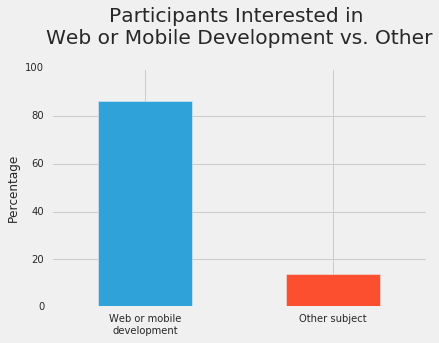

In [171]:
# Frequency table
# returns an array of booleans
web_or_mobile = no_nulls.str.contains('Web Developer|Mobile Developer') 
#percentages 
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development vs. Other',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

I then decided to compare the breakdown between web development versus mobile development in terms of interest. 

False    67.048055
True     32.951945
Name: JobRoleInterest, dtype: float64


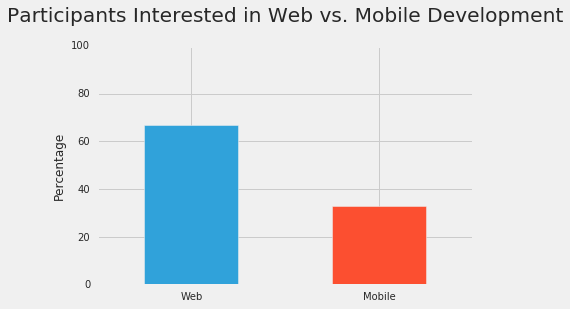

In [172]:
web = no_nulls.str.contains('Web Developer')
mobile = no_nulls.str.contains('Mobile Developer')
#percentages 
freq_table = web.value_counts(normalize = True) * 100
freq_table = mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Participants Interested in Web vs. Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web', 'Mobile'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

This section of the project focuses on better understanding where each of these new coders reside so it will be easier to decide where to advertise.

In [173]:
#Copying the data where participants provided information about job interest
ncc_df_answered = ncc_df[ncc_df['JobRoleInterest'].notnull()].copy()
#Creating frequency tables 
abs_freq=ncc_df["CountryLive"].value_counts()
rel_freq=ncc_df["CountryLive"].value_counts(normalize=True) *100
# Display the frequency tables 
pd.DataFrame(data = {'Absolute frequency': abs_freq,'Percentage': rel_freq})

,Absolute frequency,Percentage
United States of America,5791,37.760824
India,1400,9.128847
United Kingdom,757,4.936098
Canada,616,4.016693
Brazil,364,2.373500
Germany,324,2.112676
Poland,265,1.727960
Russia,263,1.714919
Australia,259,1.688837
France,228,1.486698


From the frequency table above, it is evident that the USA has the largest percentage of new coders. For the next section, I take the MoneyForLearning column which measures the USD spent by participants from the moment they start coding to the day the survey was completed. This is important to analyze since this coding bootcamp has a monthly subscription of 59 dollars per month.

In [174]:
#Creating a column to describe amount of money student has spent per month
# Replace 0s with 1s to avoid division by 0
ncc_df_answered['MonthsProgramming'].replace(0,1, inplace = True)
ncc_df_answered["MoneySpentPerMonth"] = ncc_df_answered["MoneyForLearning"]/ncc_df_answered["MonthsProgramming"]
#counting the number of null values
ncc_df_answered['MoneySpentPerMonth'].isnull().sum()

675

In [175]:
#only saving the non-null values to read_file_answered
ncc_df_answered=ncc_df_answered[ncc_df_answered['MoneySpentPerMonth'].notnull()]
ncc_df_answered=ncc_df_answered[ncc_df_answered['CountryLive'].notnull()]
ncc_df_answered['CountryLive'].value_counts().head()


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

I decided to focus on my search on the USA, India, UK, & Canada as they have the highest absolute frequencies.

In [176]:
#Calculating the mean that students spend per month
# Mean sum of money spent by students each month
countries_mean = ncc_df_answered.groupby('CountryLive').mean()
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64

To better visualize the data, I created box plots for these 4 countries. However, it is evident that Canada and UK have low values in relation to India. In terms of GDP per capita, I expected the opposite in terms of amount people would be spending on learning. Thus, I removed the outliers from each countries data.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


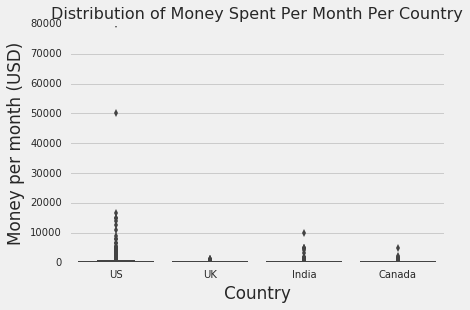

In [177]:
#creating box plots for US, India, UK, & Canada
only_4 = ncc_df_answered[ncc_df_answered['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Distribution of Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [178]:
#Isolating those who spend less than 20000
# Isolate only those participants who spend less than 10000 per month
ncc_df_answered = ncc_df_answered[ncc_df_answered['MoneySpentPerMonth'] < 20000]

In [179]:
# Recompute mean sum of money spent by students each month
countries_mean = ncc_df_answered.groupby('CountryLive').mean()
countries_mean['MoneySpentPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


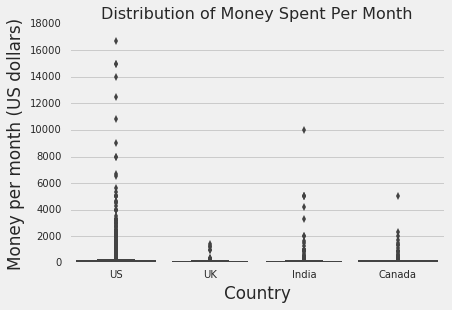

In [180]:
# Isolate again the countries of interest but isolated version
only_4 = ncc_df_answered[ncc_df_answered['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Distribution of Money Spent Per Month',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [181]:
only_4.groupby('CountryLive').mean()['MoneySpentPerMonth']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneySpentPerMonth, dtype: float64

In [182]:
#Further inspection of India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['MoneySpentPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [183]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

After removing the outliers, I went back into the data and further lessened my dataset by removing those spending under a certain amount in each country. I also removed those who have been programming under 3 months as they might not want to pay the subscription fee yet.

In [184]:
# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [185]:
# Remove the respondents who didn't attendent a bootcamp
no_camp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_camp.index)


# Remove the respondents that had been programming for less than 3 months
less_3 = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_3.index)

In [186]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['MoneySpentPerMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [187]:
only_4.groupby('CountryLive').mean()['MoneySpentPerMonth']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonth, dtype: float64

In [188]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

In [189]:
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['MoneySpentPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


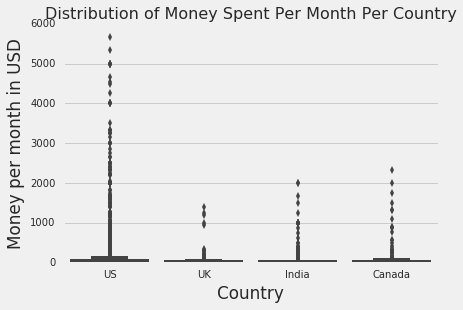

In [190]:
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Distribution of Money Spent Per Month Per Country',
          fontsize = 16)
plt.ylabel('Money per month in USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

After this analysis, I came to the conclusion that the USA is the best market to advertise in. In terms of second, I would say either Canada or India. However, I would bring this information back to the client for them to make the best decision for their company.